In [3]:
import numpy as np

def material_info(nu, E):
    KE = stiff_matrix(nu, E)
    KTr = trace_matrix(nu, E)
    lambda_, mu = lame(nu, E)
    return KE, KTr, lambda_, mu

def stiff_matrix(nu, E):
    """
    Parameters:
    - nu (flaot): Poisson 比.
    - E (int): 杨氏模量.

    Returns:
    - KE ( ndarray - (NCN*GD, NCN*GD) ): 四节点单元的刚度矩阵.

    Note:
    考虑四节点网格单元中的自由度
    0,1 - 4,5
    2,3 - 6,7
    """
    k_0 = 1/2 - nu/6
    k_1 = 1/8 + nu/8
    k_2 = nu/6
    k_3 = 1/8 - 3*nu/8
    k_4 = -1/4 - nu/12
    k_5 = -1/8 + 3*nu/8
    k_6 = -1/4 + nu/12
    k_7 = -1/8 - nu/8
    k = np.array([k_0, k_1, k_2, k_3, k_4, k_5, k_6, k_7])

    KE = E / (1 - nu**2) * np.array([
        [k[0], k[1], k[2], k[3], k[4], k[5], k[6], k[7]],
        [k[1], k[0], k[7], k[6], k[5], k[4], k[3], k[2]],
        [k[2], k[7], k[0], k[5], k[6], k[3], k[4], k[1]],
        [k[3], k[6], k[5], k[0], k[7], k[2], k[1], k[4]],
        [k[4], k[5], k[6], k[7], k[0], k[1], k[2], k[3]],
        [k[5], k[4], k[3], k[2], k[1], k[0], k[7], k[6]],
        [k[6], k[3], k[4], k[1], k[2], k[7], k[0], k[5]],
        [k[7], k[2], k[1], k[4], k[3], k[6], k[5], k[0]]
    ])

    return KE

def trace_matrix(nu, E):
    """
    应力张量的迹矩阵.

    Parameters:
    - nu (flaot): Poisson 比.
    - E (int): 杨氏模量.

    Returns:
    - KE ( ndarray - (NCN*GD, NCN*GD) ): 单元迹矩阵.

    Note:
    考虑四边形网格单元中的自由度
    0,1 - 4,5
    2,3 - 6,7
    """
    k_0 = 1/3
    k_1 = 1/4
    k_2 = 1/6
    k_3 = -1/4
    k_4 = -1/3
    k_5= 1/4
    k_6= -1/6
    k_7 = -1/4
    k = np.array([k_0, k_1, k_2, k_3, k_4, k_5, k_6, k_7])
    KTr = E / (1 - nu) * np.array([
        [k[0], k[1], k[2], k[3], k[4], k[5], k[6], k[7]],
        [k[1], k[0], k[7], k[6], k[5], k[4], k[3], k[2]],
        [k[2], k[7], k[0], k[5], k[6], k[3], k[4], k[1]],
        [k[3], k[6], k[5], k[0], k[7], k[2], k[1], k[4]],
        [k[4], k[5], k[6], k[7], k[0], k[1], k[2], k[3]],
        [k[5], k[4], k[3], k[2], k[1], k[0], k[7], k[6]],
        [k[6], k[3], k[4], k[1], k[2], k[7], k[0], k[5]],
        [k[7], k[2], k[1], k[4], k[3], k[6], k[5], k[0]]
    ])

    return KTr

def lame(nu, E):
    """
    Parameters:
    - nu (float): Poisson 比.
    - E0 (int): 杨氏模量.

    Returns:
    - lambda_(float): Lame 第一常数
    - mu: 剪切模量
    """
    lambda_ = E * nu / ((1 + nu) * (1 - 2*nu))
    mu = E / (2 * (1 + nu))

    return lambda_, mu

单元自由度

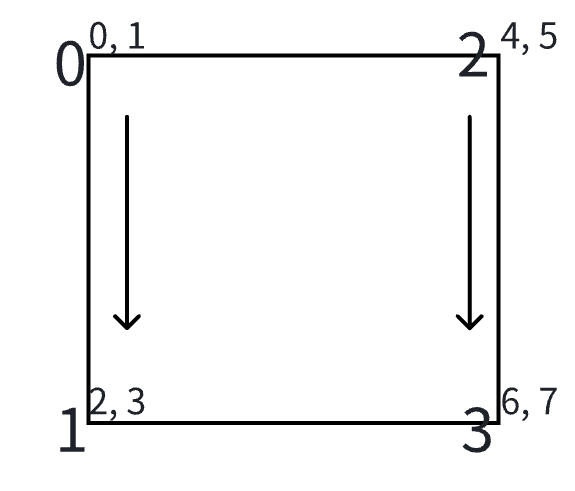

In [4]:
E0 = 1.0
nu = 0.3
KE, KTr, lambda_, mu = material_info(nu=nu, E=E0)